<a href="https://colab.research.google.com/github/nadireus/Clarusway/blob/main/Data_visualization_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [46]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [47]:
df=kill

In [18]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [19]:
df.shape

(2535, 14)

In [97]:
df.describe(include='O')

,name,date,manner_of_death,armed,gender,race,city,state,threat_level,flee
count,2535,2535,2535,2526,2535,2340,2535,2535,2535,2470
unique,2481,879,2,68,2,6,1417,51,3,4
top,TK TK,10/02/17,shot,gun,M,W,Los Angeles,CA,attack,Not fleeing
freq,49,8,2363,1398,2428,1201,39,424,1611,1695


In [98]:
df.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [99]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [112]:
df.dropna(inplace=True)

## 1a: Box plot of age in both genders separeted by manner of death.

In [114]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [115]:
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

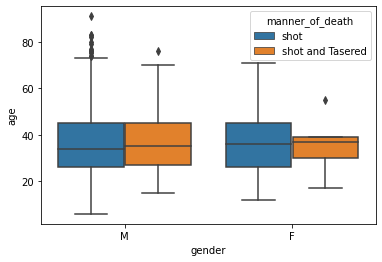

In [116]:
sns.boxplot(x='gender', y='age', data= df, hue='manner_of_death') # with seaborn

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

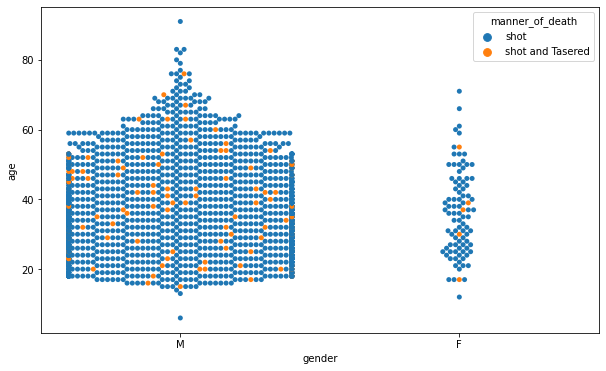

In [117]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='gender', y='age', data= df, hue='manner_of_death') # with seaborn
plt.show()


## 2: Plot 12 most dangerous cities

In [161]:
dfcity=df.city.value_counts()[:12]
dfcity

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [119]:
dfcity.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'San Antonio', 'Miami', 'St. Louis', 'Indianapolis',
       'Oklahoma City'],
      dtype='object')

In [120]:
dfcity.values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13])

In [121]:
dfs=dfcity.reset_index()
dfs

,index,city
0,Los Angeles,35
1,Phoenix,28
2,Houston,24
3,Chicago,22
4,Austin,18
5,Las Vegas,17
6,Columbus,16
7,San Antonio,15
8,Miami,15
9,St. Louis,14


In [122]:
dfs.columns=['city', 'count']

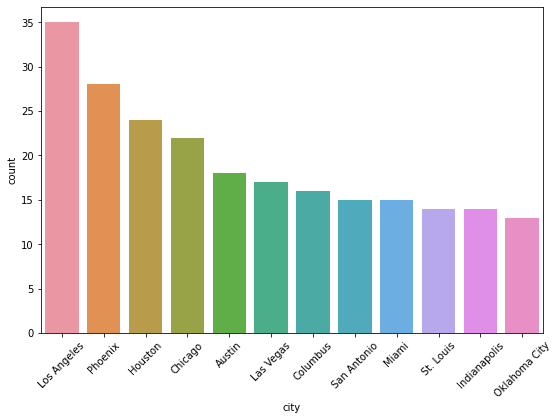

In [166]:
plt.figure(figsize=(9,6))
sns.barplot(x='city', y='count', data= dfs )
plt.xticks(rotation = 45) # with seaborn
plt.show()

##***COUNTPLOT

In [125]:
dfs.city.values

array(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin',
       'Las Vegas', 'Columbus', 'San Antonio', 'Miami', 'St. Louis',
       'Indianapolis', 'Oklahoma City'], dtype=object)

In [148]:
dangerous_city=df[df.city.isin(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin',
       'Las Vegas', 'Columbus', 'San Antonio', 'Miami', 'St. Louis',
       'Indianapolis', 'Oklahoma City'])]

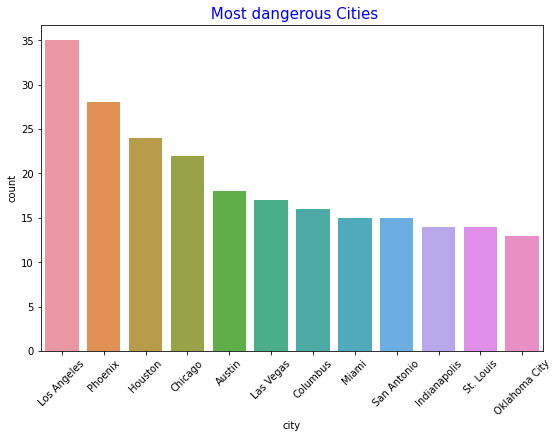

In [167]:
plt.figure(figsize=(9,6))                                                                     # with seaborn countplot
sns.countplot(dangerous_city.city, order=dangerous_city.city.value_counts().index)
plt.xticks(rotation = 45)
plt.xlabel('city')
plt.title(' Most dangerous Cities',color = 'blue', fontsize = 15)
plt.show()

## 3: Plot 20 most dangerous states

In [131]:
df.state.value_counts().head(20)

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

In [155]:
dangerousstate=df.state.value_counts().index[:20]
dangerousstate

Index(['CA', 'TX', 'FL', 'AZ', 'OH', 'NC', 'OK', 'CO', 'GA', 'MO', 'IL', 'TN',
       'WA', 'LA', 'AL', 'PA', 'NY', 'VA', 'WI', 'NM'],
      dtype='object')

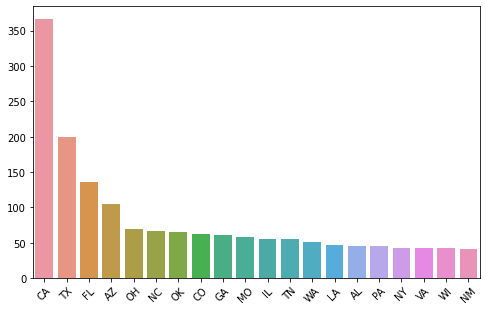

In [133]:
plt.figure(figsize=(8,5))
sns.barplot(x=df.state.value_counts().index[:20],y=df.state.value_counts().values[:20], data=df )
plt.xticks(rotation = 45) # # with seaborn barplot
plt.show()

In [156]:
dangerstate = df[df['state'].isin(dangerousstate)]

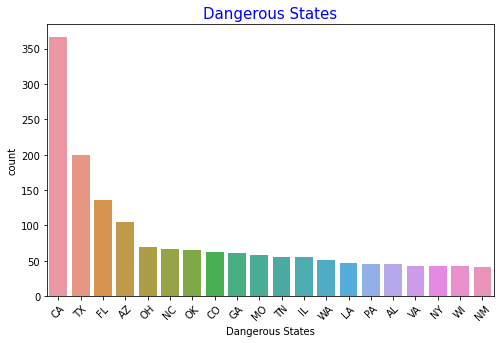

In [163]:

plt.figure(figsize=(8,5))# with seaborn countplot
sns.countplot(dangerstate.state, order=dangerstate.state.value_counts().index)
plt.xticks(rotation = 45)
plt.xlabel('Dangerous States')
plt.title('Dangerous States',color = 'blue', fontsize = 15)
plt.show()

## 4: Plot Having mental ilness or not for killed people

In [134]:
df.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [135]:
df.signs_of_mental_illness.value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

Text(0.5, 1.0, 'Having mental illness or not')

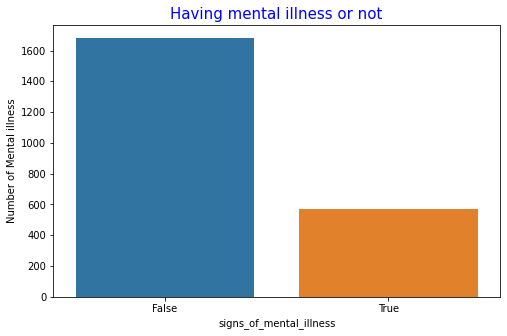

In [169]:
plt.figure(figsize=(8,5))
sns.countplot(df.signs_of_mental_illness)                                                       # with seaborn
plt.xlabel('signs_of_mental_illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

## 5: Plot number of Threat Types

In [137]:
df.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

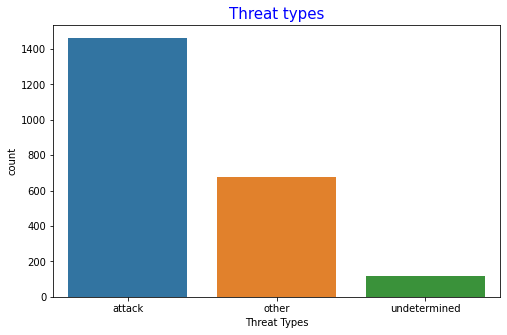

In [170]:
plt.figure(figsize=(8,5))
sns.countplot(df.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)
plt.show()

## 6: Plot number of Flee Types

In [139]:
df.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

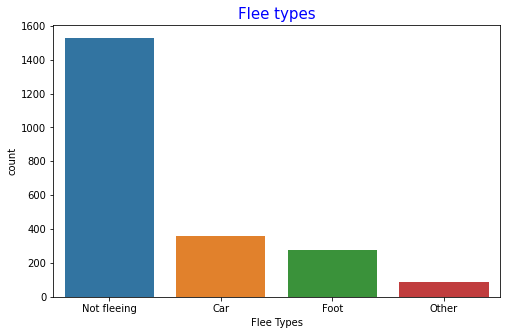

In [171]:
plt.figure(figsize=(8,5))
sns.countplot(df.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)
plt.show()# with seaborn
